# Explore

In [6]:
import re
import unicodedata
import pandas as pd
import nltk
import env

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**get data**

In [7]:
url = env.get_db_access("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
def prep_data(text:str, more_stopwords):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer() # lemmitizer object
    # add more stop words to the original dictionary stop words from the english language
    stopwords = nltk.corpus.stopwords.words('english') + more_stopwords
    # normalize the string
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    # remove not letters of numbers
    words = re.sub(r'[^\w\s]', '', text).split()
    # lemmatize the string
    lemma =  [wnl.lemmatize(word) for word in words if word not in stopwords]
    return lemma


**count of categories**

In [14]:
df.groupby("label").count()

,text
label,
ham,4825
spam,747


In [18]:
df.groupby("label").count().text/len(df)

label
ham     0.865937
spam    0.134063
Name: text, dtype: float64

**Nreak the data up into 3 seperate pieces**

- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [10]:
more_stopwords = ['r', 'u', '2', 'ltgt']
# select each gategory and join all series text together and them apply the cleaning function
ham_words = prep_data(' '.join(df[df.label == 'ham'].text), more_stopwords)
spam_words = prep_data(' '.join(df[df.label == 'spam'].text), more_stopwords)
all_words = prep_data(' '.join(df.text), more_stopwords)
all_words[:5]

['go', 'jurong', 'point', 'crazy', 'available']

**How many times does each word occur?**

In [11]:
# apply a value count to each category (count occurences of each unique word in the list)
ham_words_freq = pd.Series(ham_words).value_counts()
spam_words_freq = pd.Series(spam_words).value_counts()
all_words_freq = pd.Series(all_words).value_counts()

spam_freq.head()


NameError: name 'spam_freq' is not defined

**Create a dataframe of the results**

In [ ]:
freq_df = pd.concat([ham_words_freq, spam_words_freq, all_words_freq], axis=1).set_axis(["ham", "spam", "all"], axis=1)
freq_df

**What are the most frequently occuring words?**

In [ ]:
# most occuring words over all categories
freq_df.sort_values(by='all', ascending=False).head(10)

In [ ]:
# most occuring words based on ham
freq_df.sort_values(by='ham', ascending=False).head(10)

In [ ]:
# most occuring words based on span
freq_df.sort_values(by='spam', ascending=False).head(10)

**Are there any words that uniquely identify a spam or ham message?**

In [ ]:
# fill nulls with 0
freq_df = freq_df.fillna(0)

# all the words beloge to the ham group
completly_ham = df[["all", "spam"]][df.spam == 0]
completly_ham.head()

In [ ]:
# all the words beloge to the spam group
completly_spam =freq_df[["all", "ham"]][freq_df.ham == 0]
completly_spam.head()

### Visualize

Text(0, 0.5, 'count')

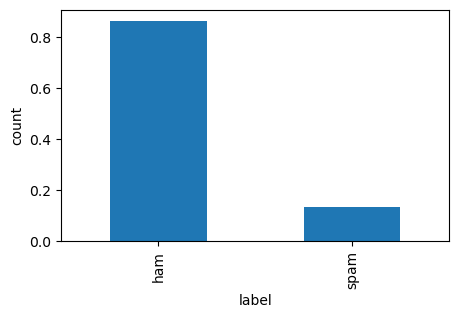

In [20]:
plt.figure(figsize=(5,3))
(df.groupby("label").count().text/len(df)).plot.bar()
plt.ylabel("count")

In [12]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')


NameError: name 'word_counts' is not defined